In [1]:
#from six.moves import urllib
#from sklearn.datasets import fetch_mldata
#try:
#    mnist = fetch_mldata('MNIST original')
#except urllib.error.HTTPError as ex:
#    print("Could not download MNIST data from mldata.org, trying alternative...")

    # Alternative method to load MNIST, if mldata.org is down
    import urllib
    from scipy.io import loadmat
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    mnist_path = "./mnist-original.mat"
    response = urllib.request.urlopen(mnist_alternative_url)
    with open(mnist_path, "wb") as f:
        content = response.read()
        f.write(content)
    mnist_raw = loadmat(mnist_path)
    mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }
    print("Success!")
    print(mnist)

Success!
{'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'target': array([0., 0., 0., ..., 9., 9., 9.]), 'COL_NAMES': ['label', 'data'], 'DESCR': 'mldata.org dataset: mnist-original'}


In [2]:
X,y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

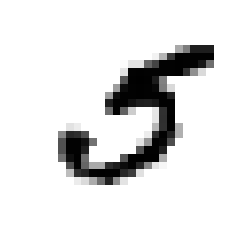

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap= matplotlib.cm.binary,
          interpolation='nearest')
plt.axis('off')
plt.show()

In [5]:
y[36000]

5.0

In [6]:
X_train, X_test, y_train, y_test = X[:60000] , X[60000:], y[:60000],y[60000:]

In [7]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train =  X_train[shuffle_index], y_train[shuffle_index]

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [9]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
sgd_clf.predict([some_digit])

array([ True])

In [11]:
#corss validation score
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.96795, 0.96455, 0.96415])

In [12]:
#not number 5 classifer
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [13]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3,scoring='accuracy')

array([0.9116 , 0.9088 , 0.90855])

In [14]:
#confusin matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

################################
########perfect prediciotn######
#####array([[54579,  0],
####       [ 0,  5421]], dtype=int64)

array([[53767,   812],
       [ 1255,  4166]], dtype=int64)

In [15]:
#precision and recall
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8368822820409804

In [16]:
recall_score(y_train_5, y_train_pred)

0.7684928979893009

In [17]:
# computing F1 score (harmonic mean of precisison and recall)
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.8012308875853447

In [18]:
#decision socres
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([4451.7681533])

In [19]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [20]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [21]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = "decision_function")
y_scores

array([ -8790.69136642,  -7118.09918413,  -5589.48202157, ...,
       -73503.83932323,   1720.0971875 , -15554.96685884])

In [22]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [23]:
def plot_precission_recall_vs_thresholds(precisions,recalls,thresholds):
    plt.plot(thresholds, precisions[:-1], '--b', label="Precisions")
    plt.plot(thresholds, recalls[:-1],"g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])

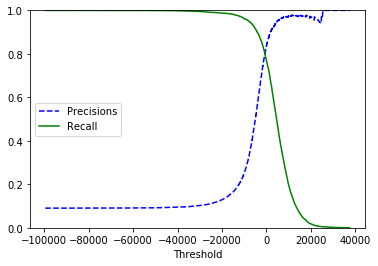

In [24]:
plot_precission_recall_vs_thresholds(precisions, recalls,thresholds)
plt.show()

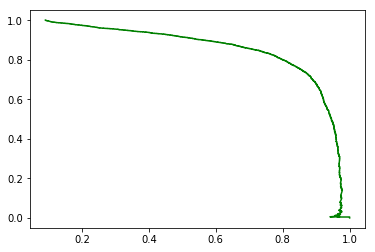

In [25]:
#plotting precisions against recall
def precission_vs_recall(precisions, recalls):
    plt.plot(precisions[:-1],recalls[:-1],'g-',label="precision")
    plt.show()
precission_vs_recall(precisions,recalls)

In [26]:
y_train_pred_90 = (y_scores > 70000)
y_train_pred_90

array([False, False, False, ..., False, False, False])

In [27]:
#ROC curve for binary clasification
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [34]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

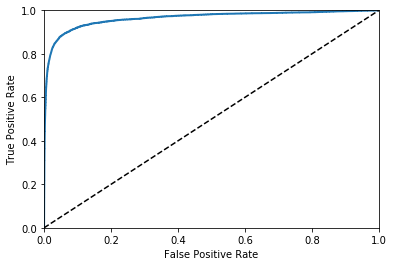

In [36]:
plot_roc_curve(fpr,tpr)
plt.show()

In [37]:
#AUC comparison (area under curve)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9638230567890841

C:\Users\marce\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\marce\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\marce\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


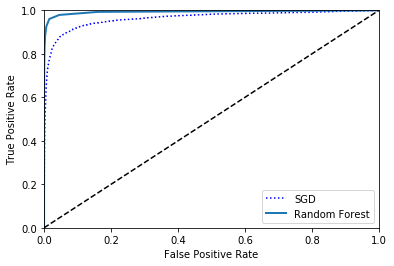

In [38]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
#to plot ROC curve you need scores not probabilities SOLUTION - use positive class's probability as the score
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)
#plotting the ROC curve
plt.plot(fpr, tpr,"b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest,"Random Forest")
plt.legend()
plt.show()

In [39]:
roc_auc_score(y_train_5, y_scores_forest)

0.9930547492545605

In [40]:
'''
training a binary classifier steps
1.choose appropriate metric
2.evaluate classifier using cross-validation
3.select precission/ recall trade off
4.compare using variouse models using ROC curves and ROC AUC
'''

'\ntraining a binary classifier steps\n1.choose appropriate metric\n2.evaluate classifier using cross-validation\n3.select precission/ recall trade off\n4.compare using variouse models using ROC curves and ROC AUC\n'

In [ ]:
#MULTICLASS CLASSIFICATION

In [43]:
#ONE VERSUS ALL (OVA)
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([5.])

In [44]:
#retourning all the socres for each number
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -7228.43136064, -21716.64333398,  -6697.52191435,
         -4089.92075629, -13865.7763872 ,   3123.43013622,
        -22020.19826431, -18062.94608272, -15710.30187883,
        -16956.09087543]])

In [45]:
np.argmax(some_digit_scores)

5

In [46]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [47]:
sgd_clf.classes_[5]

5.0

In [48]:
#multicalss classifier using OVO
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5.])

In [49]:
len(ovo_clf.estimators_)

45

In [50]:
#training random forest classifier
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

C:\Users\marce\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5.])

In [51]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [52]:
cross_val_score(sgd_clf,X_train,y_train, cv=3,scoring="accuracy")

array([0.87522496, 0.87254363, 0.85167775])

In [53]:
#scaling values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.89767047, 0.90249512, 0.89728459])

In [54]:
#Error Analysis (for improving the model) (confusion matrix)
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5582,    0,   12,    8,    6,   35,   30,    7,  242,    1],
       [   1, 6420,   44,   21,    3,   39,    5,    8,  190,   11],
       [  25,   27, 5238,   86,   71,   23,   65,   36,  379,    8],
       [  27,   19,  104, 5246,    1,  195,   25,   38,  407,   69],
       [  12,   14,   35,   13, 5216,   10,   37,   18,  335,  152],
       [  27,   17,   24,  157,   56, 4429,   85,   17,  547,   62],
       [  28,   19,   52,    2,   38,   88, 5541,    6,  144,    0],
       [  21,   12,   46,   20,   48,   15,    4, 5694,  192,  213],
       [  15,   59,   39,  100,    4,  120,   29,    9, 5434,   42],
       [  23,   21,   28,   54,  110,   27,    1,  166,  370, 5149]],
      dtype=int64)

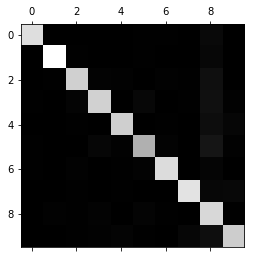

In [55]:
#matplot lib representation of confusion matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

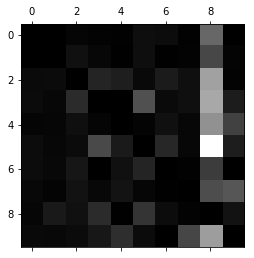

In [56]:
#plot on errors
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
#filling diagonal with zeros to keep errors only
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show

In [63]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [64]:
#plotting examples od 3s and 5s
cl_a, cl_b = 3,5
Xaa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
Xab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
Xba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
Xbb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

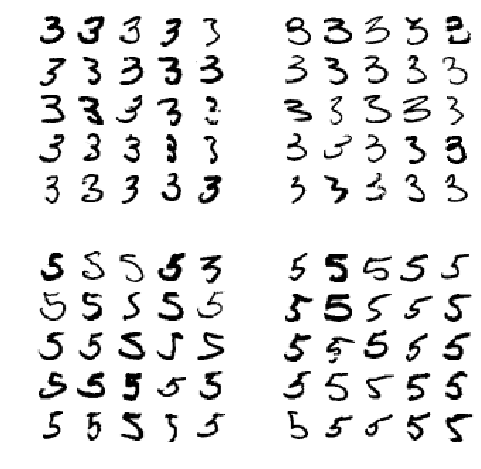

In [65]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(Xaa[:25], images_per_row=5)
plt.subplot(222); plot_digits(Xab[:25], images_per_row=5)
plt.subplot(223); plot_digits(Xba[:25], images_per_row=5)
plt.subplot(224); plot_digits(Xbb[:25], images_per_row=5)

In [66]:
#multilabel classification
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large,y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

[[False  True]]


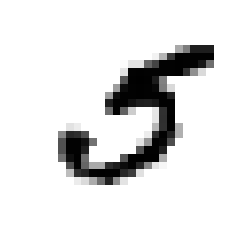

In [82]:
print(knn_clf.predict([some_digit]))
plot_digits([some_digit])

In [ ]:
#computing f1 score across all labels
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred,average="macro")